# Lab work #2
# First Name, Last Name
# Group No

# The lab work task
Solve the regression problem for the one of the presented datasets using the same steps into your work.
To get you variant: (your_num % 9), where your_num is your number in the group list.

In addition to presented in the example methods consider other ML methods like Support Vector Machine, Gradient Boosting Regression, Bayesian Ridge Regression.

Present your work in the Jupyter Notebook variant

P.s. in provided data sources you can find examples of solving this problem, but be ready to explain the code and results.

# Data to choose
0. [Gold Price Prediction](https://www.kaggle.com/datasets/franciscogcc/financial-data)
1. [Possum Regression](https://www.kaggle.com/datasets/abrambeyer/openintro-possum/data)
2. [Student Performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
3. [Boston House Prices](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data)
4. [Car Price](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
5. [Medical Cost](https://www.kaggle.com/datasets/mirichoi0218/insurance)
6. [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)
7. [Calculate Concrete Strength](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking)
8. [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset)

# Dataset: 8. [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, r2_score
from xgboost import XGBRegressor

In [57]:
df = pd.read_csv('Advertising.csv')

# Initial inspection
df.head(), df.info(), df.isnull().sum(), df.duplicated().sum(), df.mean(), df.std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


(   Id     TV  Radio  Newspaper  Sales
 0   1  230.1   37.8       69.2   22.1
 1   2   44.5   39.3       45.1   10.4
 2   3   17.2   45.9       69.3    9.3
 3   4  151.5   41.3       58.5   18.5
 4   5  180.8   10.8       58.4   12.9,
 None,
 Id           0
 TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64,
 0,
 Id           100.5000
 TV           147.0425
 Radio         23.2640
 Newspaper     30.5540
 Sales         14.0225
 dtype: float64,
 Id           57.879185
 TV           85.854236
 Radio        14.846809
 Newspaper    21.778621
 Sales         5.217457
 dtype: float64)

This data expresses sales according to the type of advertisement and the size of the cost .

The dataset contains `200` rows of 3 features [ `TV` , `Radio` , `Newspaper` ] and target variable [ `Sales` ].

Missing values: `0`

Duplicates: `0`

In [58]:
# Drop the Id column
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

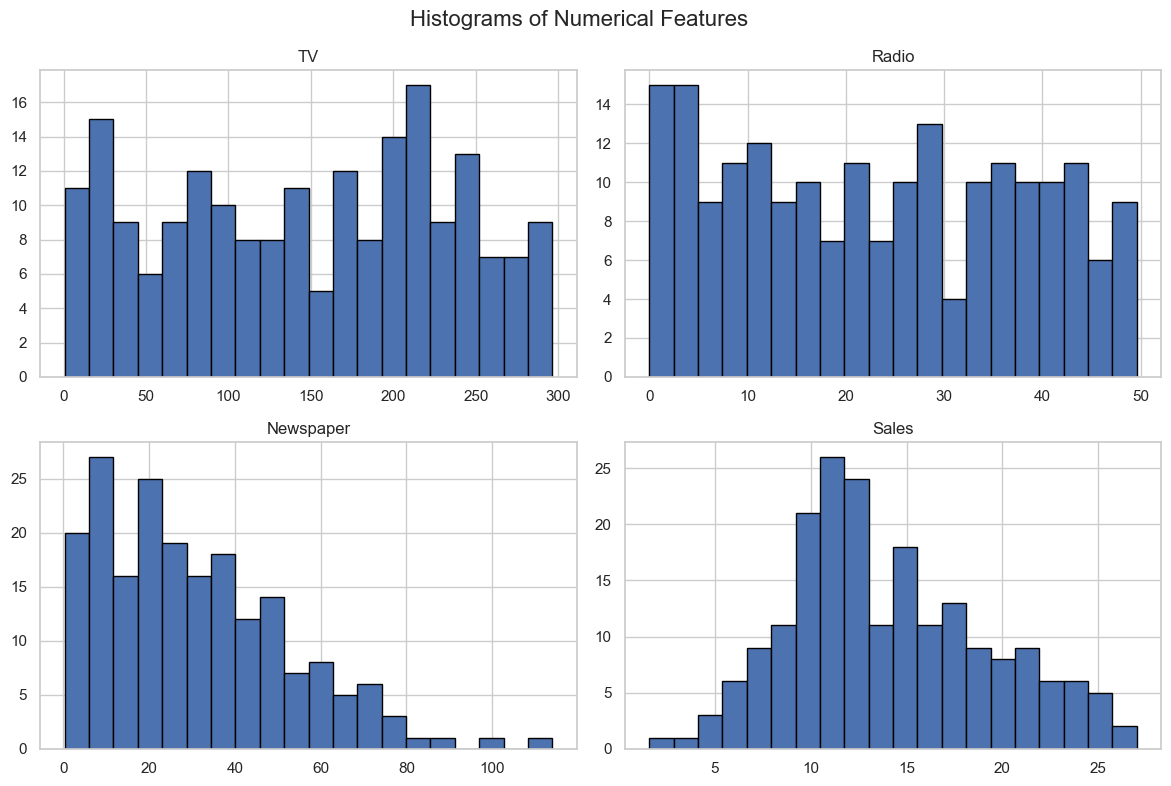

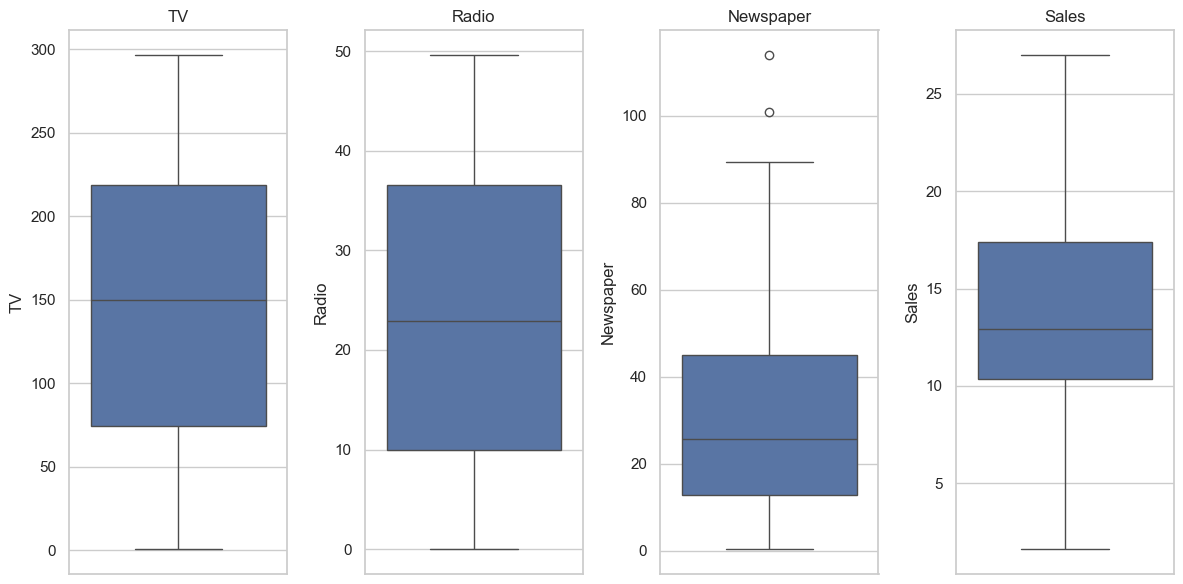

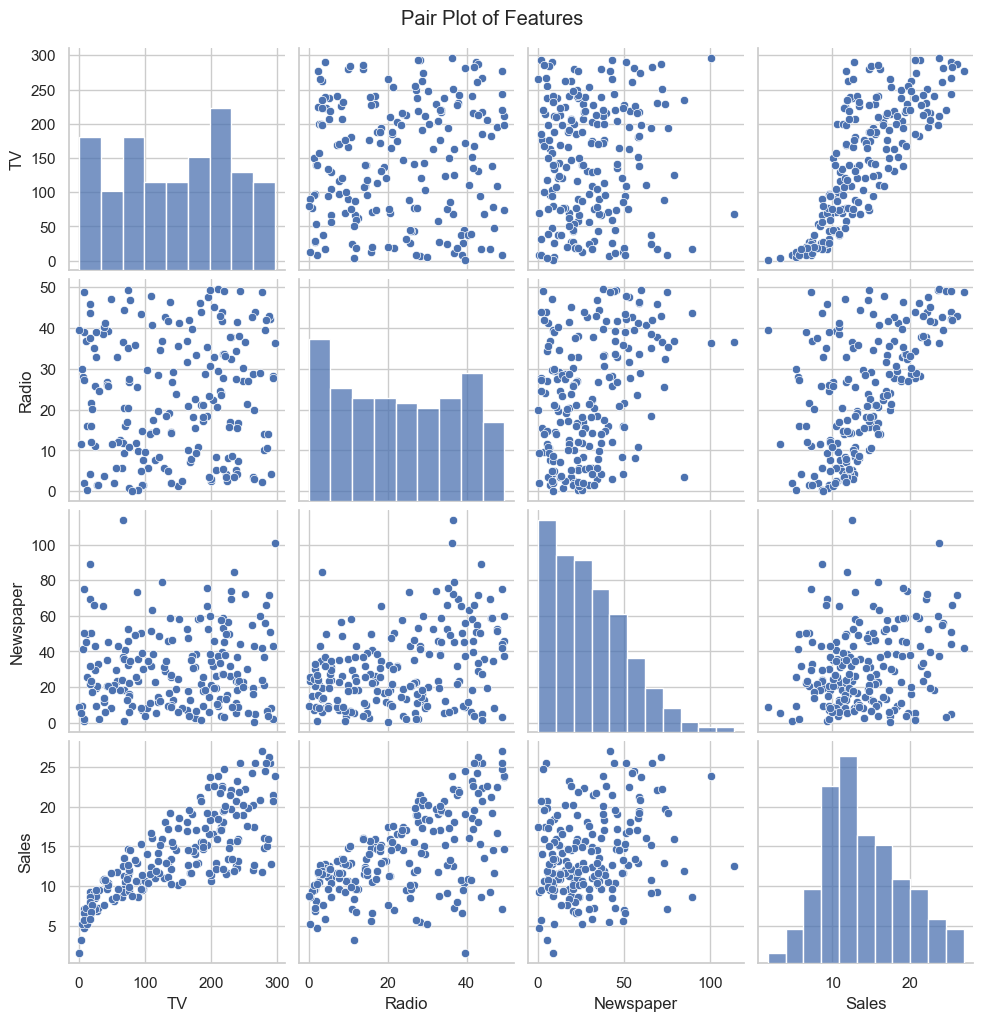

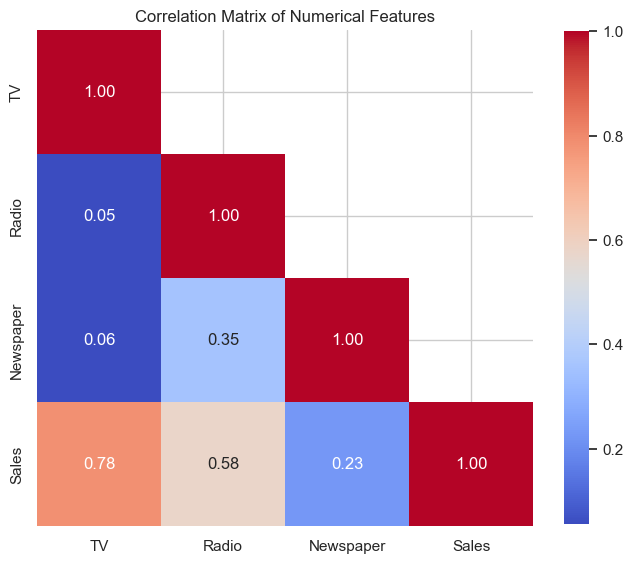

In [59]:
# Plots
# Set style
sns.set_theme(style="whitegrid")

# Plot histograms
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['TV', 'Radio', 'Newspaper', 'Sales']):
	plt.subplot(1, 4, i + 1)
	sns.boxplot(y=df[col])
	plt.title(col)
plt.tight_layout()
plt.show()

# Pair plot of all numerical features
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

seed = 123

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)

# Define models
models = {
	'Linear Regression': LinearRegression(),
	'Bayesian Ridge': BayesianRidge(),
	'Lasso': Lasso(alpha=0.001),
	'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=seed),
	'Random Forest': RandomForestRegressor(random_state=seed),
	'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=seed),
	'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=seed)
}

# Store results
results = {
	'Model': [],
	'CV RMSE': [],
	'Test RMSE': [],
	'Test R2': []
}

# Evaluate each model
for name, model in models.items():
	# Cross-validation RMSE
	cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
	cv_rmse = -np.mean(cv_scores)
	
	# Train on full training set and predict on test
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	test_rmse = root_mean_squared_error(y_test, y_pred)
	test_r2 = r2_score(y_test, y_pred)
	
	# Save results
	results['Model'].append(name)
	results['CV RMSE'].append(cv_rmse)
	results['Test RMSE'].append(test_rmse)
	results['Test R2'].append(test_r2)


               Model   CV RMSE  Test RMSE   Test R2
7  Gradient Boosting  0.869961   0.674280  0.982762
5            XGBoost  0.893302   0.811946  0.975004
4      Random Forest  0.930407   0.897937  0.969429
3      Decision Tree  1.243067   1.188609  0.946434
1     Bayesian Ridge  1.805440   1.446545  0.920663
2              Lasso  1.804227   1.447131  0.920599
0  Linear Regression  1.804362   1.447243  0.920586
6                SVR  1.828268   1.477094  0.917277


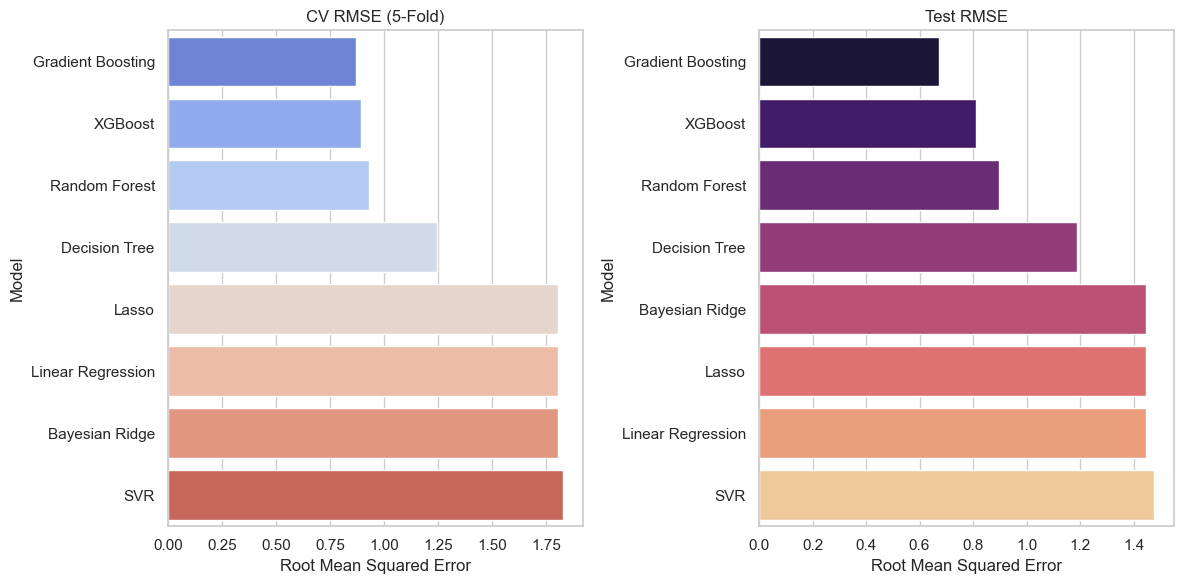

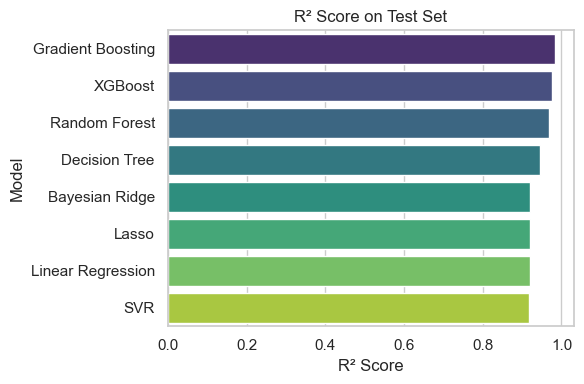

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print comparison table
print(results_df.sort_values(by='Test RMSE'))

# Plot RMSE comparison
plt.figure(figsize=(12, 6))

# CV RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='CV RMSE', y='Model', data=results_df.sort_values('CV RMSE'), 
			palette='coolwarm', hue='Model', legend=False)
plt.title('CV RMSE (5-Fold)')
plt.xlabel('Root Mean Squared Error')

# Test RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='Test RMSE', y='Model', data=results_df.sort_values('Test RMSE'), 
			palette='magma', hue='Model', legend=False)
plt.title('Test RMSE')
plt.xlabel('Root Mean Squared Error')

plt.tight_layout()
plt.show()

# Plot R2 scores
plt.figure(figsize=(6, 4))
sns.barplot(x='Test R2', y='Model', data=results_df.sort_values('Test R2', ascending=False), 
			palette='viridis', hue='Model', legend=False)
plt.title('R² Score on Test Set')
plt.xlabel('R² Score')
plt.tight_layout()
plt.show()

### Conclusions based on the results of model comparison:

1. **Gradient Boosting Regression** demonstrated the best prediction quality:
	* The lowest error values on the test dataset (RMSE = 0.674) and the highest coefficient of determination (\$R^2\$ = 0.983).
	* This indicates the high ability of the model to accurately model the relationship between advertising costs and sales.

2. **XGBoost** also showed very strong results:
	* Although inferior to Gradient Boosting in terms of accuracy, the model has a low error rate (RMSE = 0.812) and a high \$R^2\$ value (0.975).
	* XGBoost remains one of the leading solutions for regression problems due to its computational optimization and regularization.

3. **Random Forest** demonstrates stable quality:
	* It is characterized by a good compromise between accuracy (RMSE = 0.898) and generalization (\$R^2\$ = 0.969).
	* The model is less sensitive to sampling noise compared to single trees.

4. **Decision Tree** is inferior to ensemble methods:
	* Although the model is interpretable and easy to implement, it produces higher errors (RMSE = 1.189) and lower \$R^2\$ (0.946).
	* Can be used in problems where the priority is explanability rather than maximum accuracy.

5. **Linear models (Linear Regression, Lasso, Bayesian Ridge)** demonstrate similar results:
	* Accuracy indicators are worse compared to ensemble methods (RMSE ≈ 1.447, \$R^2\$ ≈ 0.921).
	* These models are limited in their ability to account for nonlinear dependencies between variables.

6. **Support Vector Regression (SVR)** has the worst results among all models:
	* The error values of RMSE = 1.477 and \$R^2\$ = 0.917 indicate that SVR is ineffective for this dataset in its current configuration.
	* Fine-tuning of kernel and regularization parameters may be required.

#### **General conclusion**.

Based on the comparison, we can conclude that **ensemble methods (Gradient Boosting, XGBoost, Random Forest)** significantly outperform linear models and individual decision trees in terms of forecast accuracy. The best choice for this regression task is **Gradient Boosting**, as it provides the lowest error and the highest consistency with actual sales values. In cases where model interpretation is important, it is advisable to consider using a decision tree or linear regression as simpler but less accurate alternatives.

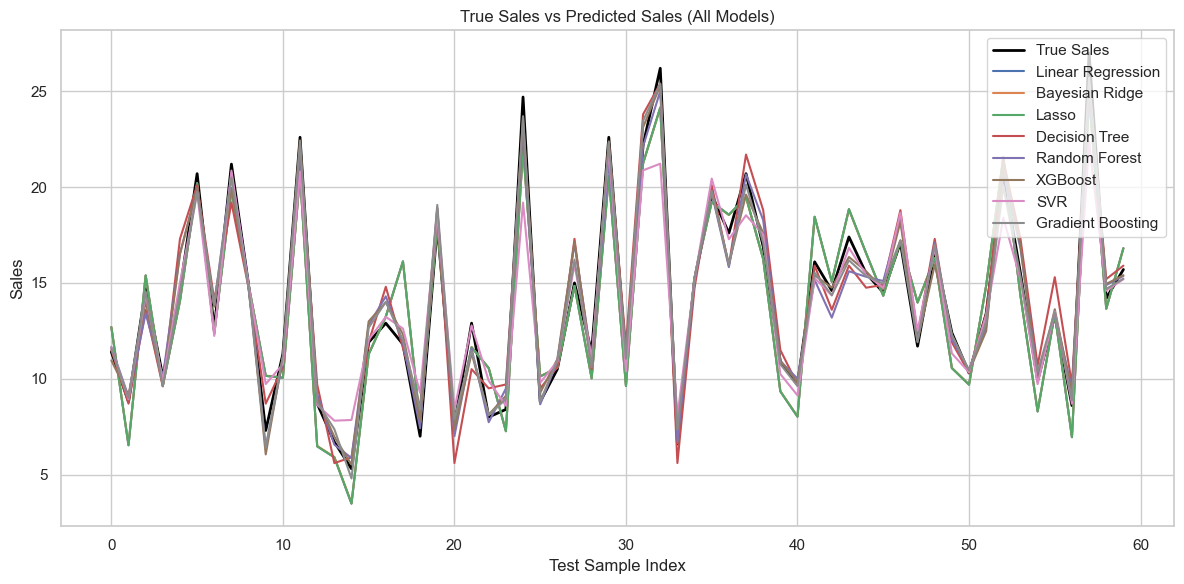

In [62]:
# Plot predictions for each model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='True Sales', linewidth=2, color='black')

for name, model in models.items():
	y_pred = model.predict(X_test)
	plt.plot(range(len(y_test)), y_pred, label=name)

plt.title('True Sales vs Predicted Sales (All Models)')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()